# Объявления о продаже Toyota Corolla (2013 - 2020 года выпуска). 

## Данные с сайта nettiauto.com на основе 1472 объявлений

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option("max_colwidth", 100)

# library & dataset
import seaborn as sns

## 1. Просмотр датасета

In [2]:
df1 = pd.read_csv('corolla1.csv')
df2 = pd.read_csv('corolla2.csv')

In [3]:
df = pd.concat([df1, df2])

In [4]:
df.head(3)

,Merkki,Vuosi,Ajettu,Hinta,Date
0,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019,23 000,23 850 €,06-2021
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019,37 000,22 980 €,08-2021


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 738
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  10739 non-null  object
 1   Vuosi   10739 non-null  object
 2   Ajettu  10739 non-null  object
 3   Hinta   10739 non-null  object
 4   Date    10739 non-null  object
dtypes: object(5)
memory usage: 503.4+ KB


## 2. Чистка датасета

In [6]:
# переименуем столбцы
df = df.rename(columns = {'Merkki': 'model_description',
                         'Vuosi': 'Year',
                         'Ajettu': 'Mileage',
                         'Hinta': 'Price',
                         'Date': 'Sold_date'})

In [7]:
# удалим пробелы
df['Mileage'] = df['Mileage'].str.replace(" ", "")
df['Price'] = df['Price'].str.replace(" ", "")

In [8]:
df.loc[9267:]

,model_description,Year,Mileage,Price,Sold_date
9267,Toyota Corolla (1.4) 1.4 D|2013|275 000|6 500 €|07-2021,2013,275000,6500€,07-2021
9268,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol MultiMode 4ov / Lohkol. + sisäp. *** Korkotarjous ...",2013,67000,13390€,07-2021
9269,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov|2013|226 000|10 900 €|06-2021",2013,226000,10900€,06-2021
9270,"Toyota Corolla (1.6) Toyota COROLLA 1,6 Valvematic Linea Sol MultiMode|2013|28 000|13 990 €|06-2021",2013,28000,13990€,06-2021
9271,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol (MY13)|2013|133 000|9 990 €|05-2021",2013,133000,9990€,05-2021
...,...,...,...,...,...
734,"Toyota Corolla (1.8) Touring Sports 1,8 Hybrid Active|2020|32 000|26 900 €|11-2021",2020,32000,26900€,11-2021
735,"Toyota Corolla (1.8) 1.8 Hatchback Hybrid Active Edition *Katso Varusteet* - ""!!! 0 KORKO 0, HUL...",2020,10000,26650€,11-2021
736,"Toyota Corolla (1.8) Touring Sports 1,8 Hybrid Active Edition|2020|19 000|26 960 €|11-2021",2020,19000,26960€,11-2021
737,"Toyota Corolla (1.8) Hatchback 1,8 Hybrid Active / Alv-väh.kelp. / Plus-paketti / Lohkol. *** Ko...",2020,27000,25790€(incl.VAT),11-2021


In [9]:
# разделим датасеты
df = df.loc[9267:]
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
9267,Toyota Corolla (1.4) 1.4 D|2013|275 000|6 500 €|07-2021,2013,275000,6500€,07-2021
9268,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol MultiMode 4ov / Lohkol. + sisäp. *** Korkotarjous ...",2013,67000,13390€,07-2021
9269,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov|2013|226 000|10 900 €|06-2021",2013,226000,10900€,06-2021


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 9267 to 738
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_description  1472 non-null   object
 1   Year               1472 non-null   object
 2   Mileage            1472 non-null   object
 3   Price              1472 non-null   object
 4   Sold_date          1472 non-null   object
dtypes: object(5)
memory usage: 69.0+ KB


In [11]:
# удалим лишнее Vuosi
df = df.drop(df.query('Year == "Vuosi"').index.values.tolist())
df = df.drop(df.query('Year == "Year"').index.values.tolist())

# удалим данные где дата продажи 0
drop_nulls = df.query('Sold_date == "00-0000"').index.values.tolist()
df = df.drop(drop_nulls)

In [12]:
df['Year'].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [13]:
# приведем к формату времени
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [14]:
# приведем к формату времени
df['Sold_date'] = pd.to_datetime(df['Sold_date'], format='%m-%Y')

In [15]:
# удалим данные где мили Eiilmoitettu
drop_next = df[df['Mileage'] == 'Eiilmoitettu'].index.values.tolist()
for i in drop_next:
    df = df.drop(index = i)

In [16]:
# удалим данные где мили Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [17]:
# удалим данные где не указан пробег
drop_ns = df[df['Mileage'] == 'Notspecified'].index.values.tolist()
for i in drop_ns:
    df = df.drop(index = i)

In [18]:
# мили целочисленные значения
df['Mileage'] = df['Mileage'].astype('float64') 

In [19]:
# цена 5 знаков
df['Price'] = df['Price'].str[:5]
# удалим пробелы
df['Price'] = df['Price'].str.replace("€", "")

In [20]:
# удалим данные где цена Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [21]:
# удалим данные где цена Notpr
drop_nt = df[df['Price'] == 'Notpr'].index.values.tolist()
for i in drop_nt:
    df = df.drop(index = i)

In [22]:
# сделаем цену целочисленным значением
df['Price'] = df['Price'].astype(int) 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 9267 to 738
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  1436 non-null   object        
 1   Year               1436 non-null   datetime64[ns]
 2   Mileage            1436 non-null   float64       
 3   Price              1436 non-null   int64         
 4   Sold_date          1436 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 67.3+ KB


In [24]:
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
9267,Toyota Corolla (1.4) 1.4 D|2013|275 000|6 500 €|07-2021,2013-01-01,275000.0,6500,2021-07-01
9268,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol MultiMode 4ov / Lohkol. + sisäp. *** Korkotarjous ...",2013-01-01,67000.0,13390,2021-07-01
9269,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov|2013|226 000|10 900 €|06-2021",2013-01-01,226000.0,10900,2021-06-01


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 9267 to 738
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  1436 non-null   object        
 1   Year               1436 non-null   datetime64[ns]
 2   Mileage            1436 non-null   float64       
 3   Price              1436 non-null   int64         
 4   Sold_date          1436 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 67.3+ KB


In [26]:
df['Age'] = (df['Sold_date'] - df['Year']) / np.timedelta64(1, 'Y')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
9267,Toyota Corolla (1.4) 1.4 D|2013|275 000|6 500 €|07-2021,2013-01-01,275000.0,6500,2021-07-01,8.495725
9268,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol MultiMode 4ov / Lohkol. + sisäp. *** Korkotarjous ...",2013-01-01,67000.0,13390,2021-07-01,8.495725
9269,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov|2013|226 000|10 900 €|06-2021",2013-01-01,226000.0,10900,2021-06-01,8.413588


In [27]:
df.describe()

,Mileage,Price,Age
count,1436.000000,1436.000000,1436.000000
mean,39663.196379,25144.845404,2.958892
std,36691.834108,4997.795631,1.831254
min,300.000000,5990.000000,1.330623
25%,16000.000000,23670.000000,1.749523
50%,29000.000000,26500.000000,2.496971
75%,48000.000000,27900.000000,2.748859
max,319000.000000,38880.000000,8.747613


In [28]:
# дропнем аномалию c пробегом
# max = df['Mileage'].max()
# drop_max = df.query('Mileage == 1310000').index.values.tolist()
# df = df.drop(drop_max)
# df.head(3)

In [29]:
# сделаем градацию по пробегу 

def mileage(col):
    if col < 20000:
        return "< 20000"
    elif 20000 <= col < 50000 :
        return "20000 - 49999"
    elif 50000 <= col < 79999 :
        return "50000 - 79999"
    elif 80000 <= col < 100000 :
        return "80000 - 99999"
    else:
        return ">= 100000"

# произведем замену значений в DF
df['mileage_range'] = df['Mileage'].apply(mileage)

In [30]:
# сделаем градацию по пробегу 

def ages_range(col):
    if col < 3:
        return "< 3"
    elif 3 <= col < 5 :
        return "3 - 4"
    elif 5 <= col < 8 :
        return "5 - 7"
    else:
        return ">= 8"

# произведем замену значений в DF
df['age_range'] = df['Age'].apply(ages_range)

#### смотрим двигатели

In [31]:
# посмотрим на мотор
df['engine'] = df['model_description'].str.extract(r'(\d.\d)')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
9267,Toyota Corolla (1.4) 1.4 D|2013|275 000|6 500 €|07-2021,2013-01-01,275000.0,6500,2021-07-01,8.495725,>= 100000,>= 8,1.4
9268,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol MultiMode 4ov / Lohkol. + sisäp. *** Korkotarjous ...",2013-01-01,67000.0,13390,2021-07-01,8.495725,50000 - 79999,>= 8,1.6
9269,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov|2013|226 000|10 900 €|06-2021",2013-01-01,226000.0,10900,2021-06-01,8.413588,>= 100000,>= 8,1.6


In [32]:
df['engine'].unique()

array(['1.4', '1.6', '1.3', '1.8', '1.2', '2,0', '2.0', '201', '202'],
      dtype=object)

In [33]:
# выбросы "201=(2.0)", "2,0=(2.0)", "0,9=(2.0)"
#df.query('engine == "202"')

In [34]:
df.loc[df['engine'] == '2,0','engine'] = '2.0'
df.loc[df['engine'] == '201','engine'] = '2.0'
df.loc[df['engine'] == '202','engine'] = '2.0'
#df.loc[df['engine'] == '0,9','engine'] = '2.0'
#df.loc[df['engine'] == '155','engine'] = '2.0'
#df.loc[df['engine'] == '3.1','engine'] = '2.0'
#df.loc[df['engine'] == '1.9','engine'] = '2.0'
#df.loc[df['engine'] == '0.9','engine'] = '2.0'
#df.loc[df['engine'] == '1,9','engine'] = '1.0'
#df.loc[df['engine'] == '196','engine'] = '2.0'
#df.loc[df['engine'] == '150','engine'] = '2.0'
#df.loc[df['engine'] == '9.8','engine'] = '2.0'
#df.loc[df['engine'] == '202','engine'] = '2.0'
#df.loc[df['engine'] == '1,0','engine'] = '1.0'

## 3. Графики 

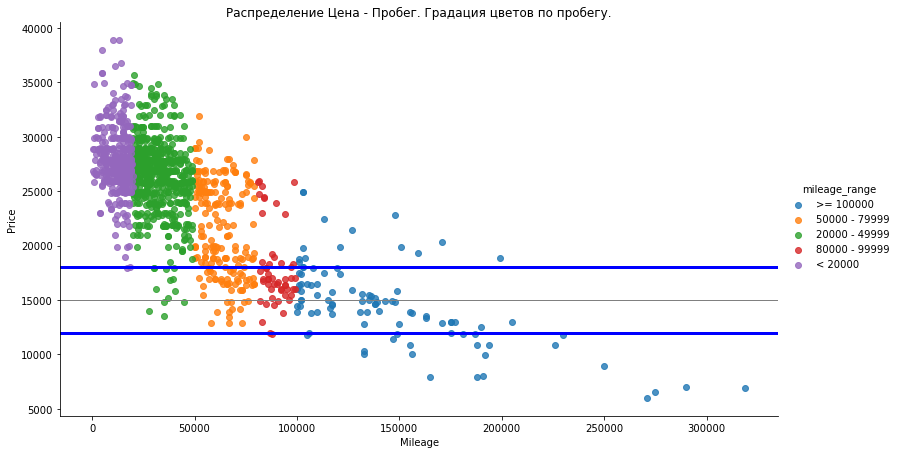

In [35]:
up_limit_budget = 18000
target_limit_budget = 15000
low_limit_budget = 12000
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='mileage_range', 
           legend=True, 
           height=6, 
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по пробегу.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

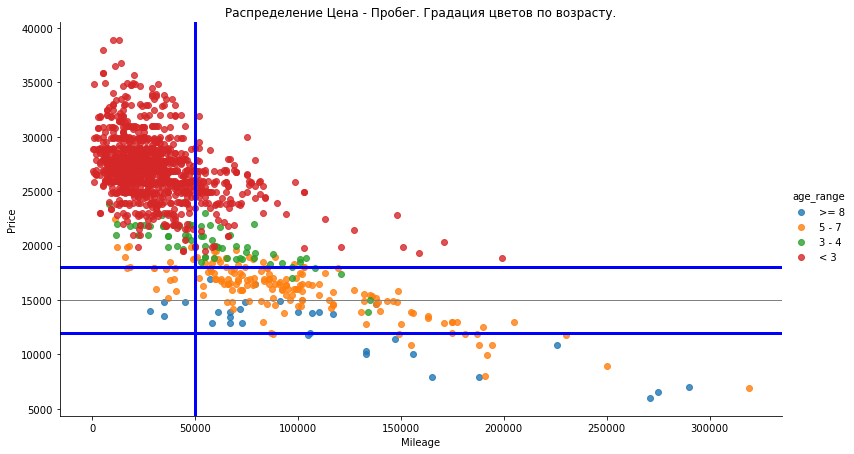

In [36]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='age_range', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по возрасту.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(50000, linestyle = '-', color ='blue', linewidth = 3);

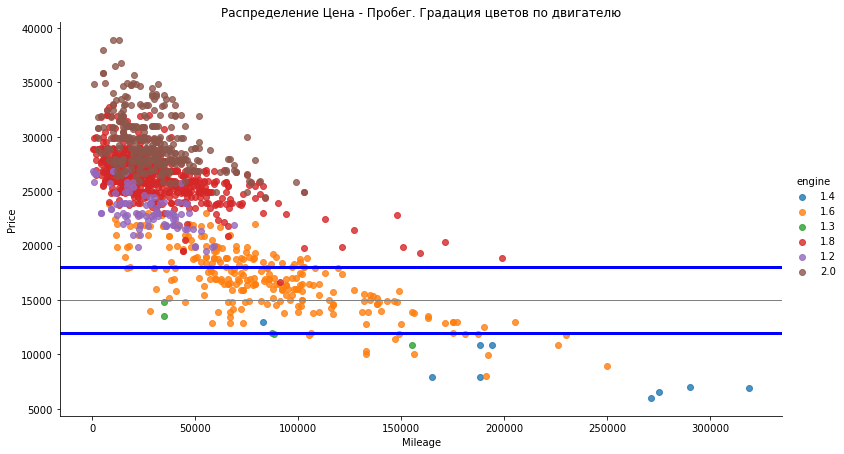

In [37]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='engine', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по двигателю");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

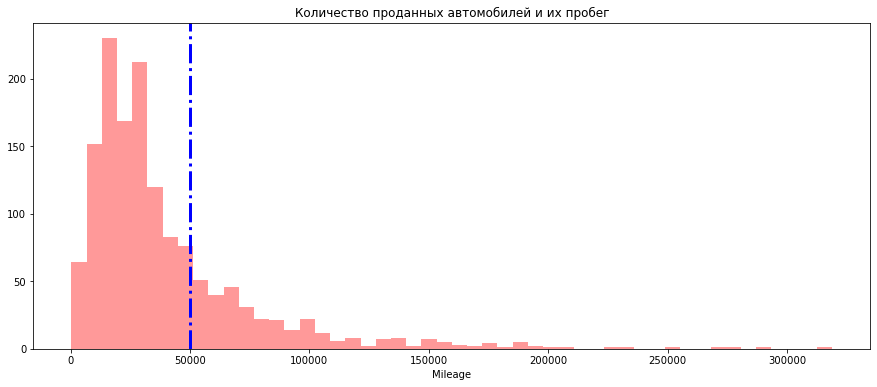

In [38]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot( df['Mileage'], 
             hist=True, 
             kde=False, 
             rug=False, 
             color="red" ).set_title('Количество проданных автомобилей и их пробег');
plt.axvline(50000, linestyle = '-.', color ='blue', linewidth = 3);
plt.xlabel("Mileage");

In [39]:
pivot_report = pd.pivot_table(df, 
                              values='Price', 
                              index=['engine'], 
                              aggfunc={'count','median'}).reset_index()
pivot_report

,engine,count,median
0,1.2,94,22990
1,1.3,5,11995
2,1.4,9,7900
3,1.6,260,16900
4,1.8,750,26880
5,2.0,318,28880


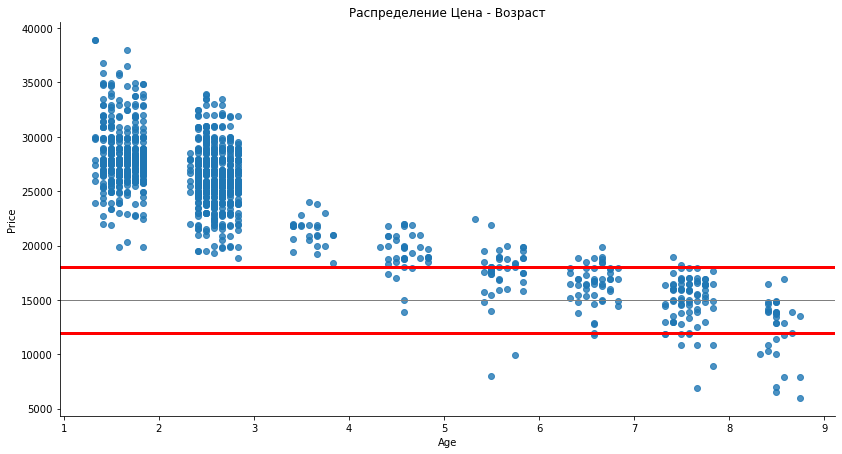

In [40]:
#fig, ax = plt.subplots(figsize=(15,6))
#ax.set_title("Распределение Год - Цена");
#use the function regplot to make a scatterplot
#sns.regplot(x=df["Age"], y=df["Price"]);

sns.lmplot(x="Age", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           legend=False,
           height=6,
           aspect=16/8.27)
ax = plt.gca();
ax.set_title("Распределение Цена - Возраст");
plt.axhline(up_limit_budget, linestyle = '-', color ='red', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='red', linewidth = 3);

In [41]:
df.corr()

,Mileage,Price,Age
Mileage,1.000000,-0.756872,0.718158
Price,-0.756872,1.000000,-0.860782
Age,0.718158,-0.860782,1.000000


## 4. Выборка из того, что интересно для покупки

In [42]:
int = df[(df['mileage_range'] == '< 20000')|(df['mileage_range'] == '20000 - 49999')]
int.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
9270,"Toyota Corolla (1.6) Toyota COROLLA 1,6 Valvematic Linea Sol MultiMode|2013|28 000|13 990 €|06-2021",2013-01-01,28000.0,13990,2021-06-01,8.413588,20000 - 49999,>= 8,1.6
9282,"Toyota Corolla (1.6) 1,6 Valvematic Linea Sol 4ov/ Vähän ajettu Helmi/|2013|45 000|14 800 €|07-2021",2013-01-01,45000.0,14800,2021-07-01,8.495725,20000 - 49999,>= 8,1.6
9286,"Toyota Corolla (1.3) 1,33 Dual VVT-i S&S Linea Terra (MY13)|2013|35 000|14 800 €|07-2021",2013-01-01,35000.0,14800,2021-07-01,8.495725,20000 - 49999,>= 8,1.3


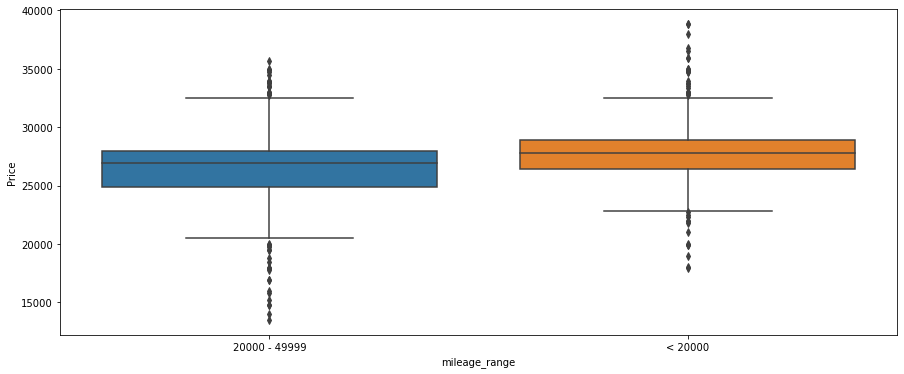

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Price"] );

In [44]:
new = df[df['mileage_range'] == '< 20000']
semi_new = df[df['mileage_range'] == '20000 - 49999']

In [45]:
new_price = new['Price'].median()
new_age = new['Age'].median()
print('медианная цена Toyota Corolla с пробегом до 20 000 км = {:.2f}, возраст автомобиля = {:.3f}'.format(new_price,new_age))

seminew_price = semi_new['Price'].median()
seminew_age = semi_new['Age'].median()
print('медианная цена Toyota Corolla с пробегом от 20000 км до 49999 км = {:.2f}, возраст автомобиля = {:.3f}'.format(seminew_price,seminew_age))

медианная цена Toyota Corolla с пробегом до 20 000 км = 27790.00, возраст автомобиля = 1.667
медианная цена Toyota Corolla с пробегом от 20000 км до 49999 км = 26900.00, возраст автомобиля = 2.497


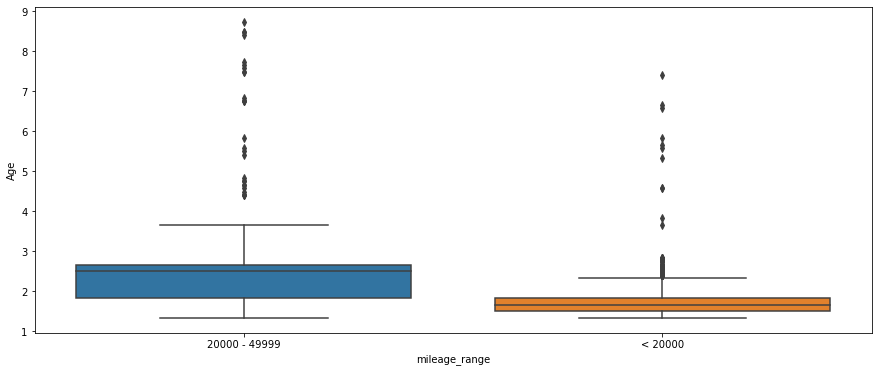

In [46]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Age"] );

In [47]:
start_range = semi_new['Price'].quantile(0.25) # 25%
end_range = semi_new['Price'].quantile(0.5) # 50%

In [48]:
print('выгодная цена для Toyota Corolla c пробегом от 20000 км до 49999 км = {:.2f} - {:.2f}'.format(start_range,end_range))

выгодная цена для Toyota Corolla c пробегом от 20000 км до 49999 км = 24900.00 - 26900.00


### Выводы

- мало автомобилей продавалась с 2013 по 2018/2019 годы. Начали активно продаваться начиная с 2018/2019 поэтому парк молодой и дорогой. Есть смысл задумываться о покупке года через 2 когда авто подешевеют.


- медианная цена Toyota Corolla с пробегом до 20 000 км = 27790.00, возраст автомобиля = 1.667


- медианная цена Toyota Corolla с пробегом от 20000 км до 49999 км = 26900.00, возраст автомобиля = 2.497


- выгодная цена для Toyota Corolla c пробегом от 20000 км до 49999 км = 24900.00 - 26900.00